In [1]:
from newscatcher import Newscatcher
import pandas as pd
from datetime import datetime

In [2]:
all_headlines_csv = 'data/google-news-headlines.csv'
all_df_headlines = pd.read_csv(all_headlines_csv)

In [3]:
now = datetime.utcnow().strftime('%Y-%m-%d %H:%M')
now

'2020-02-29 11:05'

In [4]:
# get the current headlines
ns = Newscatcher('news.google.com')
df_latest = pd.DataFrame({'datetime': now, 'headline': ns.headlines})

In [5]:
df_latest

,datetime,headline
0,2020-02-29 11:05,Coronavirus live updates: Trump calls outbreak...
1,2020-02-29 11:05,Trump urges South Carolina Republicans to vote...
2,2020-02-29 11:05,U.S. Expected to Sign Deal With Taliban to Wit...
3,2020-02-29 11:05,Coronavirus patient's dog tests positive for C...
4,2020-02-29 11:05,"Pentagon, State Department envoy clash over se..."
5,2020-02-29 11:05,‘Significant questions’ after video shows Chic...
6,2020-02-29 11:05,Ingraham: Biden bets it all on South Carolina ...
7,2020-02-29 11:05,Mike Bloomberg deploys his billions to make a ...
8,2020-02-29 11:05,There are fewer registered Republicans than in...
9,2020-02-29 11:05,Trump calls coronavirus criticism Democrats' '...


In [6]:
# merge with the old one
all_df_headlines = all_df_headlines.append(df_latest, sort=True)


In [7]:
all_df_headlines.drop_duplicates(['headline'], inplace=True)

In [8]:
# save all headlines  to file
all_df_headlines.to_csv(all_headlines_csv, index=False)

In [9]:
# is_virus is 1 if there is reference to coronavirus
all_df_headlines['is_virus']= (
    all_df_headlines['headline']
    .apply(lambda v: 1 
           if ('coronavirus' in v.lower()) or ('covid-19' in v.lower())
           else 0)
)

In [10]:
# cumu sum of number of references to virus
all_df_headlines['total_virus'] = all_df_headlines['is_virus'].cumsum()

In [11]:
df_latest_samples = all_df_headlines[all_df_headlines['is_virus']==1].tail(5)
df_latest_samples[['headline']]

,headline
0,Coronavirus live updates: Trump calls outbreak...
3,Coronavirus patient's dog tests positive for C...
9,Trump calls coronavirus criticism Democrats' '...
13,Israel's third election in 11 months has new c...
37,How Coronavirus Could Impact the Global Supply...


In [12]:
# plot chart number of headline mentioning coronavirus
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

png_file = 'images/google-news-headlines.png'
# convert to pd.datetime
all_df_headlines['datetime_idx'] = pd.to_datetime(all_df_headlines['datetime'], format="%Y-%m-%d %H:%M")
all_df_headlines.set_index('datetime_idx', inplace=True)


In [13]:
all_df_headlines

,datetime,headline,is_virus,total_virus
datetime_idx,,,,
2020-02-27 19:51:00,2020-02-27 19:51,The 31 wildest lines from Donald Trump's self-...,1,1
2020-02-27 21:14:00,2020-02-27 21:14,Coronavirus: Outbreak at 'decisive point' as W...,1,2
2020-02-27 21:14:00,2020-02-27 21:14,Shooter at Milwaukee Molson Coors had a long-r...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,Democratic Leaders Willing to Risk Party Damag...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,"Catherine Pugh, Former Baltimore Mayor, Senten...",0,2
...,...,...,...,...
2020-02-29 11:05:00,2020-02-29 11:05,Huawei is testing its own Search app for its s...,0,261
2020-02-29 11:05:00,2020-02-29 11:05,NFL combine winners and losers from Day 2 - NF...,0,261
2020-02-29 11:05:00,2020-02-29 11:05,Deputies linked to Kobe Bryant crash-photo mat...,0,261


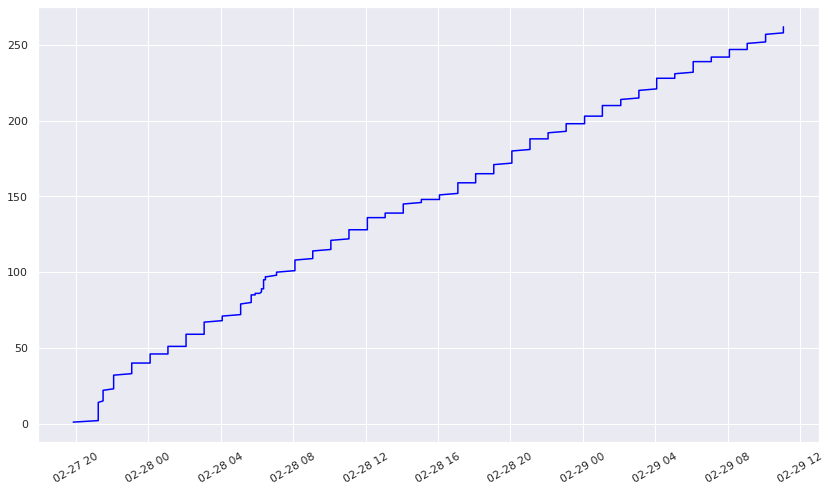

In [14]:
sns.set(rc={'figure.figsize':(14,8)})

fig, axs = plt.subplots(nrows=1)

sns.lineplot(x=all_df_headlines.index, y = 'total_virus', data=all_df_headlines, ax= axs, estimator=None, color='blue')

axs.set_xlabel('')
axs.set_ylabel('')
axs.tick_params(axis='x', labelrotation=30)

In [15]:
fig.savefig(png_file)
